### Random Forests Example 3.1
We study the random forest approach for the **heart** data. We use the **sklearn.ensemble.RandomForestClassifier()** function in **Python** to compute the models. Note that a bagged tree is a special instance of random forest (with $m = p$), such that the cumbersome procedure in the previous section is obsolete. 

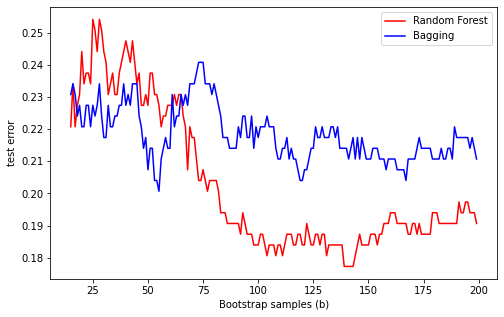

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)
df['ChestPain'], ChestPain_codes = pd.factorize(df['ChestPain'])
df['Thal'], Thal_codes = pd.factorize(df['Thal'])
# Drop NA rows:
df.dropna(inplace=True)

X = df.drop(columns=['AHD_Yes'])
y = df['AHD_Yes']

n_features = X.shape[1]

# Tree controlls for RF
rfc_settings = {'oob_score': True, 
                'max_features': np.sqrt(n_features)/n_features,
                'random_state': 1, 
                'warm_start': True}
bag_settings = {'oob_score': True, 
                'max_features': n_features, 
                'random_state': 1, 
                'warm_start': True}

# loop over B estimators
B = np.arange(15, 200, 1)

rfc = RandomForestClassifier().set_params(**rfc_settings)
bag = RandomForestClassifier().set_params(**bag_settings)

error_rfc = []
error_bag = []

for b in B:
    # Grow and fit tree
    rfc.set_params(n_estimators=b)
    bag.set_params(n_estimators=b)

    rfc.fit(X, y)
    bag.fit(X, y)
 
    # Record the OOB error
    error_rfc.append(1 - rfc.oob_score_)
    error_bag.append(1 - bag.oob_score_)
    
# display results
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(B, error_rfc, 'r-', label='Random Forest')
plt.plot(B, error_bag, 'b-', label='Bagging')

ax.set_xlabel('Bootstrap samples (b)')
ax.set_ylabel('test error')
plt.legend()
plt.show()

The figure shows the OOB error estimates for a bagged tree (cyan) and a random forest with $m = \sqrt{p}$ (red) depending on the number of trees. It becomes clear that the random forest outperforms the bagged tree by approximately $3\%$. 

### Random Forests Example 3.2
For the random forest model we can compute the variable importance as follows:


In [4]:
# Feature Importances based onthe impurity decrease
importance = rfc.feature_importances_
features = X.columns.values

# Sort by importance
features = features[np.argsort(importance)]
importance = importance[np.argsort(importance)]

fi = pd.DataFrame({'feature': features,
                   'importance': importance})
print(fi)

      feature  importance
0         Fbs    0.010402
1     RestECG    0.023922
2         Sex    0.033263
3       Slope    0.045718
4       ExAng    0.058270
5      RestBP    0.075715
6        Chol    0.079140
7         Age    0.090973
8     Oldpeak    0.104287
9   ChestPain    0.104912
10       Thal    0.112000
11      MaxHR    0.129631
12         Ca    0.131768


As can be seen, the **Ca** variable is the most influential with an normalized average decrease in the Gini index of $13\%$ followed by **MaxHR** and **Thal**.     

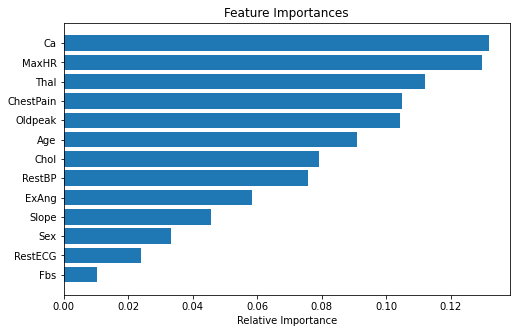

In [5]:
# Visualize results
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.title('Feature Importances')
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), features)
plt.xlabel('Relative Importance')
plt.show()

The figure shows the importance of the variables in descending order as seen from above. It can for example be seen that the variables **Fbs** or **RestECG** have only small contribution for  modelling **AHD**. 